# ECBM E4040 Assignment 2 - Task 1: Regularizations

In this task, you are going to experiment with two popular regularization methods. 

** Dropout:** In the last assignment, you have trained a shallow network and everything looked fine. However, when the network becomes larger and deeper, it will also become harder to train. The first potential problem is over-fitting, that is, the network overreacts to noise or random errors of the training data, while it fails to detect the underlying distribution pattern. It is more likely to occur when the model becomes complex and contains more trainable parameters. Dropout is a well-known method that can eliminate such effects. The core idea behind it is quite simple, ie., rather than updating all trainable parameters each time, it randomly selects a subset of parameters to update and keeps other parameters unaltered.



** Batch normalization:** Batch normalization makes it possible to train a deep network. When a network becomes deeper, the distribution of hidden neurons' values will also shift greatly, and that is one reason that makes it hard to train a deep neural network. Machine learning teaches that normalization is a good preprocessing method to deal with such a problem. So  batch normalization deploys a similar idea in the neural network. It re-normalizes the hidden values of each layer before transfering values to the next layer.


* References
    * https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf
    * https://arxiv.org/pdf/1502.03167.pdf
    * https://www.tensorflow.org/api_docs/python/tf/contrib/layers/batch_norm
    * https://github.com/tensorflow/tensorflow/blob/r1.3/tensorflow/contrib/layers/python/layers/layers.py
    * https://www.tensorflow.org/api_docs/python/tf/nn/batch_normalization

In [1]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from ecbm4040.cifar_utils import load_data

## Load Data

In [3]:
# Load the raw CIFAR-10 data.
X_train, y_train, X_test, y_test = load_data()
X_val = X_train[:500,:]
y_val = y_train[:500]
X_train = X_train[500:2500,:]
y_train = y_train[500:2500]

mean_image = np.mean(X_train, axis=0).astype(np.float32)
X_train = X_train.astype(np.float32) - mean_image
X_val = X_val.astype(np.float32) - mean_image

# We've vectorized the data for you. That is, we flatten the 32×32×3 images into 1×3072 Numpy arrays.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

./data/cifar-10-python.tar.gz already exists. Begin extracting...
Training data shape:  (2000, 3072)
Training labels shape:  (2000,)
Validation data shape:  (500, 3072)
Validation labels shape:  (500,)


## Part 1: Dropout

### Implement dropout foward function

<span style="color:red"><strong>TODO:</strong></span> Edit functions **dropout_forward** in **./ecbm4040/reg_funcs.py**. If the code is running correctly, you will see that the outputs of checking code should be close to each other. Also, if the function is correct, then the output mean should be close to each other.

In [4]:
x_in = np.random.randn(500, 500) + 10

In [5]:
from ecbm4040.reg_funcs import dropout_forward
from ecbm4040.reg_funcs import dropout_backward

p = 0.5
dropout_config = {"enabled": True, "keep_prob": p}
# feedforward
out, cache = dropout_forward(x=x_in, dropout_config=dropout_config, mode="train")
out_test, _ = dropout_forward(x=x_in, dropout_config=dropout_config, mode="test") 
# backward
dout = np.ones_like(x_in)
dx = dropout_backward(dout, cache)
#######################################
# Checking code. Don't change it.     #
#######################################
# Check forward correctness

print("mean_of_input = {}".format(p*np.mean(x_in)))
print("mean_of_out = {}".format(np.mean(out)))
print("mean_of_out_test = {}".format(np.mean(out_test)))

mean_of_input = 4.999730703304205
mean_of_out = 4.987177961091767
mean_of_out_test = 9.99946140660841


### Experiments with MLP

<span style="color:red"><strong>TODO:</strong></span>

1. Add dropout into MLP. Please review **loss**, **predict** function of class **MLP** in **./ecbm4040/neuralnets/mlp.py**, and understand how **dropout** is added into MLP.

2. Customize your own MLP network.Then, train networks with different **keep_prob**, like 0.1, 0.5, 0.7, 0.9, 1. If **keep_prob**==1, then the network become the normal MLP without dropout.

3. Plot the loss, train accuracy and valid accuracy curve.

In [8]:
from ecbm4040.neuralnets.mlp import MLP 
from ecbm4040.optimizers import AdamOptim

In [9]:
# Here is an example on how to collect loss and accuracy info
dropout_config = {"enabled":True, "keep_prob": 1}
model = MLP(input_dim=3072, hidden_dims=[200], num_classes=10, 
            weight_scale=1e-3, l2_reg=0.0, dropout_config=dropout_config)
optimizer = AdamOptim(model)
# hist_no_dropout contains loss, train acc and valid acc history.
hist_no_dropout = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=20, batch_size=100, learning_rate=1e-3, learning_decay=0.95, 
                           verbose=False, record_interval = 4)

number of batches for training: 20
epoch 1: valid acc = 0.182, new learning rate = 0.00095
epoch 2: valid acc = 0.298, new learning rate = 0.0009025
epoch 3: valid acc = 0.32, new learning rate = 0.000857375
epoch 4: valid acc = 0.34, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.336, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.344, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.372, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.37, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.372, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.358, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.374, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.36, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.38, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.35, new learning rate = 0.00048767497911552944
epoch 15: valid acc = 

In [10]:
# small retention rate
dropout_config = {"enabled":True, "keep_prob": 0.1}
model = MLP(input_dim=3072, hidden_dims=[200], num_classes=10, 
            weight_scale=1e-3, l2_reg=0.0, dropout_config=dropout_config)
optimizer = AdamOptim(model)
# hist_no_dropout contains loss, train acc and valid acc history.
hist_05_dropout = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=20, batch_size=100, learning_rate=1e-3, learning_decay=0.95, 
                           verbose=False, record_interval = 4)

number of batches for training: 20
epoch 1: valid acc = 0.222, new learning rate = 0.00095
epoch 2: valid acc = 0.262, new learning rate = 0.0009025
epoch 3: valid acc = 0.27, new learning rate = 0.000857375
epoch 4: valid acc = 0.288, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.324, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.27, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.296, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.272, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.308, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.288, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.296, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.302, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.278, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.292, new learning rate = 0.00048767497911552944
epoch 15: valid ac

In [11]:
# keep prob 0.5
dropout_config = {"enabled":True, "keep_prob": 0.5}
model = MLP(input_dim=3072, hidden_dims=[200], num_classes=10, 
            weight_scale=1e-3, l2_reg=0.0, dropout_config=dropout_config)
optimizer = AdamOptim(model)
# hist_no_dropout contains loss, train acc and valid acc history.
hist_05_dropout = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=20, batch_size=100, learning_rate=1e-3, learning_decay=0.95, 
                           verbose=False, record_interval = 4)

number of batches for training: 20
epoch 1: valid acc = 0.254, new learning rate = 0.00095
epoch 2: valid acc = 0.24, new learning rate = 0.0009025
epoch 3: valid acc = 0.328, new learning rate = 0.000857375
epoch 4: valid acc = 0.308, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.336, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.354, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.36, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.37, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.362, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.362, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.382, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.38, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.382, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.39, new learning rate = 0.00048767497911552944
epoch 15: valid acc =

In [12]:
# keep prob 0.7
dropout_config = {"enabled":True, "keep_prob": 0.7}
model = MLP(input_dim=3072, hidden_dims=[200], num_classes=10, 
            weight_scale=1e-3, l2_reg=0.0, dropout_config=dropout_config)
optimizer = AdamOptim(model)
# hist_no_dropout contains loss, train acc and valid acc history.
hist_07_dropout = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=20, batch_size=100, learning_rate=1e-3, learning_decay=0.95, 
                           verbose=False, record_interval = 4)

number of batches for training: 20
epoch 1: valid acc = 0.168, new learning rate = 0.00095
epoch 2: valid acc = 0.266, new learning rate = 0.0009025
epoch 3: valid acc = 0.32, new learning rate = 0.000857375
epoch 4: valid acc = 0.312, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.356, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.358, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.364, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.372, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.374, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.372, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.37, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.386, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.382, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.368, new learning rate = 0.00048767497911552944
epoch 15: valid ac

In [13]:
# keep prob 0.9
dropout_config = {"enabled":True, "keep_prob": 0.9}
model = MLP(input_dim=3072, hidden_dims=[200], num_classes=10, 
            weight_scale=1e-3, l2_reg=0.0, dropout_config=dropout_config)
optimizer = AdamOptim(model)
# hist_no_dropout contains loss, train acc and valid acc history.
hist_09_dropout = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=20, batch_size=100, learning_rate=1e-3, learning_decay=0.95, 
                           verbose=False, record_interval = 4)

number of batches for training: 20
epoch 1: valid acc = 0.228, new learning rate = 0.00095
epoch 2: valid acc = 0.25, new learning rate = 0.0009025
epoch 3: valid acc = 0.29, new learning rate = 0.000857375
epoch 4: valid acc = 0.354, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.336, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.356, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.374, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.38, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.356, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.402, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.374, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.368, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.358, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.348, new learning rate = 0.00048767497911552944
epoch 15: valid acc

In [14]:
loss_hist_no_dropout, train_acc_hist_no_dropout, val_acc_hist_no_dropout = hist_no_dropout
loss_hist_05_dropout, train_acc_hist_05_dropout, val_acc_hist_05_dropout = hist_05_dropout
loss_hist_07_dropout, train_acc_hist_07_dropout, val_acc_hist_07_dropout = hist_07_dropout
loss_hist_09_dropout, train_acc_hist_09_dropout, val_acc_hist_09_dropout = hist_09_dropout

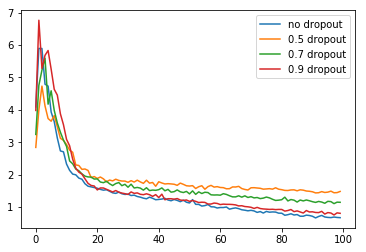

In [15]:
# plot loss curve
plt.plot(loss_hist_no_dropout, label="no dropout")
plt.plot(loss_hist_05_dropout, label="0.5 dropout")
plt.plot(loss_hist_07_dropout, label="0.7 dropout")
plt.plot(loss_hist_09_dropout, label="0.9 dropout")
plt.legend()
plt.show()

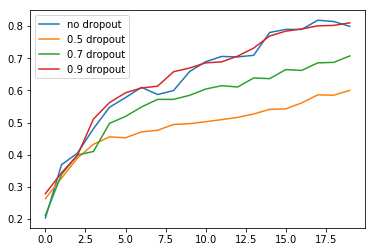

In [16]:
# plot train acc
plt.plot(train_acc_hist_no_dropout, label="no dropout")
plt.plot(train_acc_hist_05_dropout, label="0.5 dropout")
plt.plot(train_acc_hist_07_dropout, label="0.7 dropout")
plt.plot(train_acc_hist_09_dropout, label="0.9 dropout")
plt.legend()
plt.show()

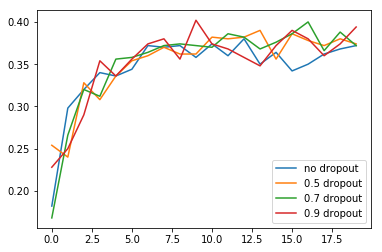

In [17]:
# plot val acc
plt.plot(val_acc_hist_no_dropout, label="no dropout")
plt.plot(val_acc_hist_05_dropout, label="0.5 dropout")
plt.plot(val_acc_hist_07_dropout, label="0.7 dropout")
plt.plot(val_acc_hist_09_dropout, label="0.9 dropout")
plt.legend()
plt.show()

<span style="color:red"><strong>TODO:</strong></span> Describe what you find in this dropout experiment.

Answer: 

    The training accuracy of methods with dropout is not as good as one with no dropout. However, the validation accuracy of methods with dropout is actually higher than the method without dropout.
    
    This indicates that methods with dropout could efficiently prevent overfitting and has a better performance.

## Part 2: Batch Normalization

### Implement batch normalization foward function

<span style="color:red"><strong>TODO:</strong></span> Edit functions **bn_forward** in **./ecbm4040/reg_funcs.py**. If the code is running correctly, you will see that the outputs of checking code should be close to each other.

In [26]:
from ecbm4040.reg_funcs import bn_forward
from ecbm4040.reg_funcs import bn_backward

np.random.seed(4040)
N, D, H1, H2 = 200, 10, 5, 3
x_in = np.random.randn(N, D)
w1 = np.random.randn(D,H1)
w2 = np.random.randn(H1,H2)
a2 = np.maximum(x_in.dot(w1),0).dot(w2)

# Before batch normalization
print("mean of a2: ", np.mean(a2, axis=0))
print("var of a2: ", np.var(a2, axis=0))

# Test "train mode" of forward function
# After batch normalization, the mean should be close to zero and var should be close to one. 
bn_config = {"epsilon":1e-5, "decay":0.9}
gamma = np.ones(H2)
beta = np.zeros(H2)
a2_bn, _ = bn_forward(a2, gamma, beta, bn_config, "train")
print("(train) mean of a2_bn: ", np.mean(a2_bn, axis=0))
print("(train) var of a2_bn: ", np.var(a2_bn, axis=0))

mean of a2:  [ 1.79186704 -1.67375614 -0.40317141]
var of a2:  [ 19.78665186   3.35093598   6.67922991]
(train) mean of a2_bn:  [  3.23630012e-16   1.64868119e-16  -5.46437895e-17]
(train) var of a2_bn:  [ 0.99999949  0.99999702  0.9999985 ]


In [29]:
# Test "moving average" and "test mode" of forward function
# Then you are going to run the forward function under "training mode" for several times, 
# and the moving mean and moving var will be close to the real mean and var of the input data.
# Next, run the forward function under "test" mode and you will see that the mean and var of its 
# output will be also close to gamma, beta that you have set before.

bn_config = {"epsilon":1e-5, "decay":0.9}
gamma = np.ones(H2)
beta = np.zeros(H2)

# collect_data: for calculating real mean and var of a2 later.
collect_data = a2
for _ in range(100):
    x_in = np.random.randn(N, D)
    a2 = np.maximum(x_in.dot(w1),0).dot(w2)
    collect_data = np.concatenate((collect_data, a2), axis=0)
    bn_forward(a2, gamma, beta, bn_config, "train")

# compare moving_mean and moving_var with real mean and var.
# You should see that they are close to each other.
print("real mean of data: ", np.mean(collect_data, axis=0))
print("(real var of data: ", np.var(collect_data, axis=0))
print("moving mean of data: ", bn_config["moving_mean"])
print("(moving var of data: ", bn_config["moving_var"])

# "test mode" of forward function
# After bn_forward, the mean and var of output should be kind of close to gamma and beta.
x_in = np.random.randn(N, D)
a2 = np.maximum(x_in.dot(w1),0).dot(w2)
print("*"*80)
print("mean of a2: ", np.mean(a2, axis=0))
print("var of a2: ", np.var(a2, axis=0))
a2_bn, _ = bn_forward(a2, gamma, beta, bn_config, "test")
print("(test) mean of a2_bn: ", np.mean(a2_bn, axis=0))
print("(test) var of a2_bn: ", np.var(a2_bn, axis=0))

real mean of data:  [ 1.61850406 -1.60723044 -0.79227966]
(real var of data:  [ 16.3517066    2.66542085   6.83475172]
moving mean of data:  [ 1.60939374 -1.60502569 -0.83762818]
(moving var of data:  [ 15.64375136   2.57559871   6.58540737]
********************************************************************************
mean of a2:  [ 2.38380631 -1.74639063 -0.50472873]
var of a2:  [ 14.85985966   2.58600276   7.86797149]
(test) mean of a2_bn:  [ 0.19579509 -0.08808496  0.12972433]
(test) var of a2_bn:  [ 0.94989046  1.00403557  1.1947567 ]


In [30]:
# After verifying the forward function and save the bn_config.
x_in = np.random.randn(N, D)
a2 = np.maximum(x_in.dot(w1),0).dot(w2)
da2_bn = np.ones_like(a2)
# Test backward function with tensorflow
#bn_config = {"eps":1e-5, "decay":0.9, "moving_mean":moving_mean, "moving_var":moving_var}
gamma = np.ones(H2)
beta = np.zeros(H2)
a2_bn, cache = bn_forward(a2, gamma, beta, bn_config, "test")
da2, dgamma, dbeta = bn_backward(da2_bn, cache)

# Checking code below.
a2_tf = tf.Variable(a2)
eps = bn_config["epsilon"]
mean_tf = bn_config["moving_mean"]
var_tf = bn_config["moving_var"]
gamma_tf = tf.Variable(gamma)
beta_tf = tf.Variable(beta)
a2_bn_tf = tf.nn.batch_normalization(a2_tf, mean_tf, var_tf, beta_tf, gamma_tf, eps)
# derive gradients
da2_tf = tf.gradients(a2_bn_tf, a2_tf)
dgamma_tf = tf.gradients(a2_bn_tf, gamma_tf)
dbeta_tf = tf.gradients(a2_bn_tf, beta_tf)

init = tf.global_variables_initializer()
tf_output = (a2_bn_tf, da2_tf[0], dgamma_tf[0], dbeta_tf[0])
with tf.Session() as sess:
    sess.run(init)
    a2_bn_check, da2_check, dgamma_check, dbeta_check = sess.run(tf_output)
    
# Make comparison
print("Is a2_bn correct? {}".format(np.allclose(a2_bn, a2_bn_check)))
print("Is da2 correct? {}".format(np.allclose(da2, da2_check)))
print("Is dgamma correct? {}".format(np.allclose(dgamma, dgamma_check)))
print("Is dbeta correct? {}".format(np.allclose(dbeta, dbeta_check)))

Is a2_bn correct? True
Is da2 correct? True
Is dgamma correct? True
Is dbeta correct? True


### Experiments with MLP

<span style="color:red"><strong>TODO:</strong></span>

1. Add batch normalization into MLP. Please understand **loss**, **predict** function of class **MLP** in **./ecbm4040/neuralnets/mlp.py**

2. First create a shallow MLP like two-layer network like [100,10]. And train it without/with batch normalization. Plot the loss, train accuracy and valid accuracy curve.

3. Then, create a 5-layer MLP network like [100,50,50,50,10] and train the network with/without batch normalization. Again, Plot the loss, train accuracy and valid accuracy curve.

4. Make a comparison and describe what you have found in this experiment.

**Experiment on shallow MLP** 

In [31]:
# Build a two-layer netowrk without batch normalization.
# Here is a demo.
use_bn = False
model = MLP(input_dim=3072, hidden_dims=[100], num_classes=10, 
            weight_scale=1e-3, l2_reg=0.0, use_bn=use_bn)
optimizer = AdamOptim(model)
# hist_shallow_no_bn contains loss, train acc and valid acc history.
hist_shallow_no_bn = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=50, batch_size=100, learning_rate=1e-3, learning_decay=0.95, 
                           verbose=False, record_interval = 4)

number of batches for training: 20
epoch 1: valid acc = 0.224, new learning rate = 0.00095
epoch 2: valid acc = 0.26, new learning rate = 0.0009025
epoch 3: valid acc = 0.332, new learning rate = 0.000857375
epoch 4: valid acc = 0.334, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.35, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.372, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.35, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.346, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.348, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.332, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.346, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.356, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.35, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.358, new learning rate = 0.00048767497911552944
epoch 15: valid acc 

In [32]:
# Build a two-layer netowrk with batch normalization. Remember to "use_bn".
use_bn = True
model = MLP(input_dim=3072, hidden_dims=[100], num_classes=10, 
            weight_scale=1e-3, l2_reg=0.0, use_bn=use_bn)
optimizer = AdamOptim(model)
# hist_shallow_no_bn contains loss, train acc and valid acc history.
hist_shallow_bn = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=50, batch_size=100, learning_rate=1e-3, learning_decay=0.95, 
                           verbose=False, record_interval = 4)

number of batches for training: 20
epoch 1: valid acc = 0.168, new learning rate = 0.00095
epoch 2: valid acc = 0.204, new learning rate = 0.0009025
epoch 3: valid acc = 0.23, new learning rate = 0.000857375
epoch 4: valid acc = 0.23, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.234, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.256, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.254, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.256, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.26, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.256, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.254, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.26, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.258, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.254, new learning rate = 0.00048767497911552944
epoch 15: valid acc 

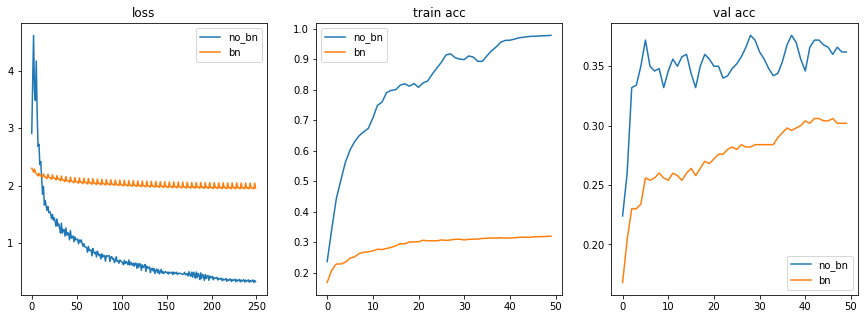

In [33]:
# Plot both results together and make a comparison. 
title_name = ["loss", "train acc", "val acc"]
_, axarr = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    axarr[i].plot(hist_shallow_no_bn[i], label="no_bn")
    axarr[i].plot(hist_shallow_bn[i], label="bn")
    axarr[i].legend(), axarr[i].set_title(title_name[i])
plt.show()

**Experiment on deep MLP**

In [4]:
# Build a deep 5-layer netowrk without batch normalization. Remember to "use_bn".
use_bn = False
model = MLP(input_dim=3072, hidden_dims=[100, 50, 50, 50], num_classes=10, 
            weight_scale=1e-3, l2_reg=0.0, use_bn=use_bn)
optimizer = AdamOptim(model)
# hist_no_dropout contains loss, train acc and valid acc history.
hist_deep_no_bn = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=50, batch_size=100, learning_rate=1e-3, learning_decay=0.95, 
                           verbose=False, record_interval = 4)

number of batches for training: 20
epoch 1: valid acc = 0.086, new learning rate = 0.00095
epoch 2: valid acc = 0.086, new learning rate = 0.0009025
epoch 3: valid acc = 0.086, new learning rate = 0.000857375
epoch 4: valid acc = 0.086, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.086, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.086, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.086, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.086, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.086, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.086, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.086, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.086, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.086, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.086, new learning rate = 0.00048767497911552944
epoch 15: valid 

In [5]:
# Build a deep 5-layer netowrk with batch normalization. Remember to "use_bn".
use_bn = True
model = MLP(input_dim=3072, hidden_dims=[100, 50, 50, 50], num_classes=10, 
            weight_scale=1e-3, l2_reg=0.0, use_bn=use_bn)
optimizer = AdamOptim(model)
# hist_no_dropout contains loss, train acc and valid acc history.
hist_deep_bn = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=50, batch_size=100, learning_rate=1e-3, learning_decay=0.95, 
                           verbose=False, record_interval = 4)

number of batches for training: 20
epoch 1: valid acc = 0.134, new learning rate = 0.00095
epoch 2: valid acc = 0.156, new learning rate = 0.0009025
epoch 3: valid acc = 0.148, new learning rate = 0.000857375
epoch 4: valid acc = 0.108, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.12, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.144, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.152, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.158, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.158, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.156, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.158, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.16, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.16, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.162, new learning rate = 0.00048767497911552944
epoch 15: valid acc

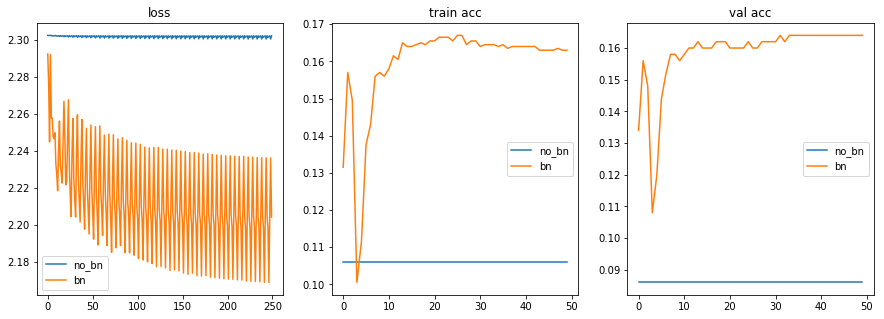

In [6]:
# Plot both results together and make a comparison. 
title_name = ["loss", "train acc", "val acc"]
_, axarr = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    axarr[i].plot(hist_deep_no_bn[i], label="no_bn")
    axarr[i].plot(hist_deep_bn[i], label="bn")
    axarr[i].legend(), axarr[i].set_title(title_name[i])
plt.show()

<span style="color:red"><strong>TODO:</strong></span> Describe what you find in this experiment.

Answer: 
    Shallow network without batch normalization works better it learns faster and has a higher validation accuracy. While in deep network, model without batch barely learns at all and the one with batch normalization works much better.
    
    Batch normalization is very useful in deep network.

## Part 3: Dropout + Batch Normalization (optional)

In [7]:
# Create a deep netowrk with both dropout and batch normalization.
# keep probability is set to 0.7 here
dropout_config = {"enabled":True, "keep_prob": 0.7}
use_bn = True
model = MLP(input_dim=3072, hidden_dims=[100, 50, 50, 50], num_classes=10, 
            weight_scale=1e-3, l2_reg=0.0, use_bn=use_bn)
optimizer = AdamOptim(model)
# hist_no_dropout contains loss, train acc and valid acc history.
hist_deep_bn_dropout = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=50, batch_size=100, learning_rate=1e-3, learning_decay=0.95, 
                           verbose=False, record_interval = 4)

number of batches for training: 20
epoch 1: valid acc = 0.11, new learning rate = 0.00095
epoch 2: valid acc = 0.146, new learning rate = 0.0009025
epoch 3: valid acc = 0.138, new learning rate = 0.000857375
epoch 4: valid acc = 0.1, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.124, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.146, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.156, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.15, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.162, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.158, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.154, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.158, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.158, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.158, new learning rate = 0.00048767497911552944
epoch 15: valid acc 

In [8]:
# deep network with only dropout for comparison
dropout_config = {"enabled":True, "keep_prob": 0.7}
use_bn = False
model = MLP(input_dim=3072, hidden_dims=[100, 50, 50, 50], num_classes=10, 
            weight_scale=1e-3, l2_reg=0.0, use_bn=use_bn)
optimizer = AdamOptim(model)
# hist_no_dropout contains loss, train acc and valid acc history.
hist_deep_dropout = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=50, batch_size=100, learning_rate=1e-3, learning_decay=0.95, 
                           verbose=False, record_interval = 4)

number of batches for training: 20
epoch 1: valid acc = 0.086, new learning rate = 0.00095
epoch 2: valid acc = 0.086, new learning rate = 0.0009025
epoch 3: valid acc = 0.086, new learning rate = 0.000857375
epoch 4: valid acc = 0.086, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.086, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.086, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.086, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.086, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.086, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.086, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.086, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.086, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.086, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.086, new learning rate = 0.00048767497911552944
epoch 15: valid 

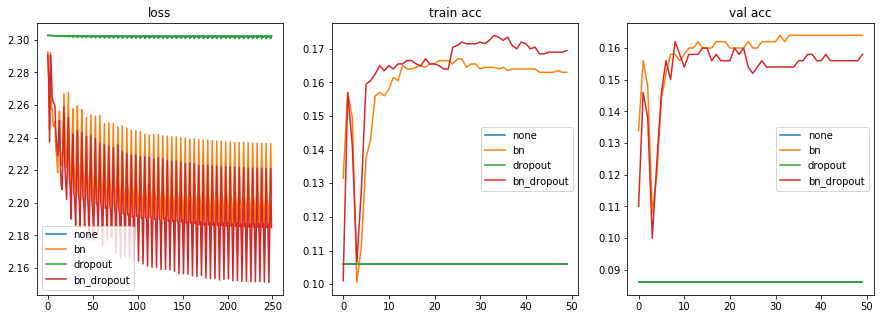

In [9]:
title_name = ["loss", "train acc", "val acc"]
_, axarr = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    axarr[i].plot(hist_deep_no_bn[i], label="none")
    axarr[i].plot(hist_deep_bn[i], label="bn")
    axarr[i].plot(hist_deep_dropout[i], label="dropout")
    axarr[i].plot(hist_deep_bn_dropout[i], label="bn_dropout")
    axarr[i].legend(), axarr[i].set_title(title_name[i])
plt.show()

## Reference
* Weight Normalization: A Simple Reparameterization to Accelerate Training of Deep Neural Networks https://arxiv.org/abs/1602.07868
* Highway netowrk https://arxiv.org/pdf/1505.00387.pdf